In [17]:
import json
import os 
print(os.getcwd())
dict_raw = json.load(open("small_data/ace/english/raw/raw.json"))
print(len(dict_raw))

/mnt/nfs/work1/smsarwar/ask
16249


In [18]:
print(dict_raw[0].keys())

dict_keys(['sentence', 'golden-entity-mentions', 'golden-event-mentions', 'stanford-colcc', 'words', 'pos-tags', 'lemma', 'parse'])


In [20]:
print(dict_raw[0])

{'sentence': 'New Questions About Attacking Iraq; Is Torturing Terrorists Necessary?', 'golden-entity-mentions': [], 'golden-event-mentions': [], 'stanford-colcc': ['ROOT/dep=1/gov=-1', 'compound/dep=0/gov=1', 'mark/dep=2/gov=3', 'dep/dep=3/gov=1', 'dobj/dep=4/gov=3', 'punct/dep=5/gov=4', 'cop/dep=6/gov=9', 'nsubj/dep=7/gov=9', 'compound/dep=8/gov=9', 'parataxis/dep=9/gov=4', 'punct/dep=10/gov=9'], 'words': ['New', 'Questions', 'About', 'Attacking', 'Iraq', ';', 'Is', 'Torturing', 'Terrorists', 'Necessary', '?'], 'pos-tags': ['NNP', 'NNP', 'IN', 'VBG', 'NNP', ':', 'VBZ', 'NNP', 'NNPS', 'NNP', '.'], 'lemma': ['New', 'Questions', 'about', 'attack', 'Iraq', ';', 'be', 'Torturing', 'Terrorists', 'Necessary', '?'], 'parse': '(ROOT\n  (FRAG\n    (NP (NNP New) (NNP Questions))\n    (PP (IN About)\n      (S\n        (VP (VBG Attacking)\n          (NP\n            (NP (NNP Iraq))\n            (: ;)\n            (SQ (VBZ Is)\n              (NP (NNP Torturing))\n              (NP (NNPS Terrorists

In [21]:
for sentence in dict_raw:
    if len(sentence["golden-event-mentions"]) > 0: 
        print(sentence["golden-event-mentions"])
        break
        

[{'trigger': {'text': 'landed', 'start': 27, 'end': 28}, 'arguments': [{'role': 'Vehicle', 'entity-type': 'VEH:Water', 'text': 'a 30-foot Cuban patrol boat with four heavily armed men', 'start': 17, 'end': 27}, {'role': 'Artifact', 'entity-type': 'PER:Group', 'text': 'four heavily armed men', 'start': 23, 'end': 27}, {'role': 'Destination', 'entity-type': 'LOC:Region-General', 'text': 'American shores', 'start': 29, 'end': 31}], 'event_type': 'Movement:Transport'}]


In [22]:
dict_raw = json.load(open("small_data/ace/arabic/raw/raw.json"))
print(len(dict_raw))

2088


In [23]:
event_types = {}
for sentence in dict_raw:
    if len(sentence["golden-event-mentions"]) > 0: 
        #print(sentence)
        #print(type(sentence["golden-event-mentions"]))
        for i, mention in enumerate(sentence["golden-event-mentions"]):
            event_types.setdefault(sentence["golden-event-mentions"][i]["event_type"], [])
            l = [sentence["sentence"], sentence["golden-event-mentions"][i]["trigger"]["text"], sentence["golden-event-mentions"][i]["trigger"]["start"], sentence["golden-event-mentions"][i]["trigger"]["end"]]
            event_types[sentence["golden-event-mentions"][i]["event_type"]].append(l)
            
        #break

In [24]:
print(len(event_types))

31


Justice:Appeal 19
Justice:Sentence 51
Movement:Transport 392
Transaction:Transfer-Money 42
Conflict:Attack 455
Personnel:End-Position 53
Personnel:Elect 37
Business:Start-Org 9
Life:Die 213
Life:Injure 121
Justice:Trial-Hearing 61
Justice:Charge-Indict 49
Justice:Arrest-Jail 100
Justice:Release-Parole 28
Contact:Meet 190
Justice:Extradite 6
Personnel:Start-Position 41
Contact:Phone-Write 48
Conflict:Demonstrate 58
Business:End-Org 8
Justice:Convict 5
Life:Be-Born 5
Justice:Fine 27
Justice:Acquit 3
Life:Marry 16
Transaction:Transfer-Ownership 8
Personnel:Nominate 5
Life:Divorce 4
Justice:Sue 2
Justice:Pardon 2
Business:Declare-Bankruptcy 1


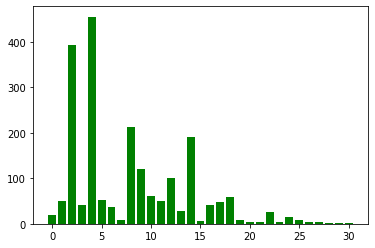

<Figure size 432x288 with 0 Axes>

In [25]:
import pandas as pd
data = []
count = 0
for key in event_types: 
    print(key, len(event_types[key]))
    for sentence in event_types[key]:
        data.append([key, len(event_types[key]), sentence[0], sentence[1], sentence[2], sentence[3]])

df = pd.DataFrame(data, columns=["Event_Type", "Count", "Sample_sentence", "Trigger", "Start", "End"])
df.to_csv("results/data/arabic_query.csv", sep = "\t", encoding="utf-8", index=True)

#df.to_csv("results/data/ace_arabic_event_type_distribution.csv", sep = "\t", encoding="utf-8", index=True)
import matplotlib.pyplot as plt
values = [] #in same order as traversing keys
keys = [] #also needed to preserve order
count = 0
for key in event_types.keys():
    keys.append(count)
    count+=1
    values.append(int(len(event_types[key])))
plt.bar(keys, values, color='g')
plt.show()
plt.savefig("results/figures/ace_arabic_event_type_distribution.png")